#### PUROPOSE OF THE NOTEBOOK
This notebook deals with analysis and visualizing the processed data from the Data Processing Notebook.
It also deals with application on statistical tests on the unemployment claims data.

**PROBLEM STATEMENT:**
1. How COVID 19 has an impact on the employment/unemployment in the county?
2. How many unemployment claims were filed during 2020-2021?
3. How COVID 19 affected different genders, races, education levels, ethnicities?
4. Is there any impact of masking enforcements on the employment/ unemployment in the county?

**YEARS:**
Comparision of 2020 and 2021

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.legend import Legend
sns.set()

import math
import scipy
from statsmodels.stats import weightstats as ws

I am going to start with the frst problem statement. To do that I will first visualize the daily COVID 19 cases and the employment/unemployment numbers in the county to see if I find any trends.

#### VISUALIZING THE NORFOLK COUNTY COVID 19 CASES

In [2]:
# inporting covid confirmed cases data
norfolk_df = pd.read_csv("../processed/norfolk_covid.csv")
# converting the date column to datetime
norfolk_df['Date'] = pd.to_datetime(norfolk_df['Date'])

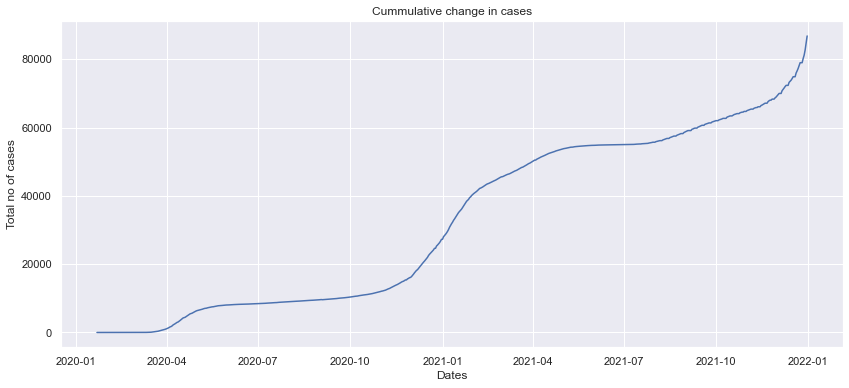

In [3]:
# Plotting the change in monthly cases 
plt.figure(figsize=(14,6))
plt.plot(norfolk_df['Date'],norfolk_df['no_of_cases'])
plt.xlabel('Dates')
plt.ylabel('Total no of cases')
plt.title('Cummulative change in cases')
plt.show()

#### ANALYZING THE EMPLOYMENT AND WAGES DATA

Starting the analysis with the employment and wages data. I am going to visualize the number of employed per month for 2022-2021

In [4]:
# import employment data 
employment = pd.read_csv("../processed/consolidatedEmpReport.csv")

In [5]:
employment.head()

,index,Employed
0,2020-01-01,350221
1,2020-02-01,346420
2,2020-03-01,344288
3,2020-04-01,277657
4,2020-05-01,285126


In [6]:
# convert date to dateime
employment['index'] = pd.to_datetime(employment['index']) 

Text(0.5, 1.0, 'Employment Trend in Norfolk County during 2020-2021')

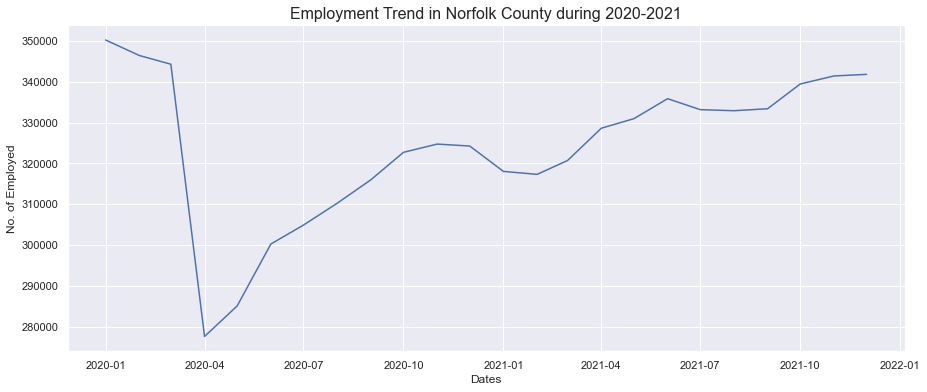

In [7]:
#plotting the number of employed people in Norfolk county between 2020-2021
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(employment['index'],employment['Employed'])
ax.set_xlabel('Dates')
ax.set_ylabel('No. of Employed')
ax.set_title('Employment Trend in Norfolk County during 2020-2021', fontsize=16)

**OBSERVATIONS:**
It can be seen that there is a sharp declined in employment right at the onset of the pandemic and first rise in cases.\
However, as the cases increase, the employment numbers also increase.

This dataset does not give me sufficient information on the labor force or the unemployment rates. So instead if using the Employment and Wages Data, I will use the Labor and Unemployment Data.

#### ANALYZING THE LABOR AND UNEMPLOYMENT DATA

In [8]:
# reading the labor datset
labor = pd.read_csv("../processed/Labor_UnEmp.csv")
# converting the date column to datetime
labor['date'] = pd.to_datetime(labor['date'])

Text(0, 0.5, 'Labor Force')

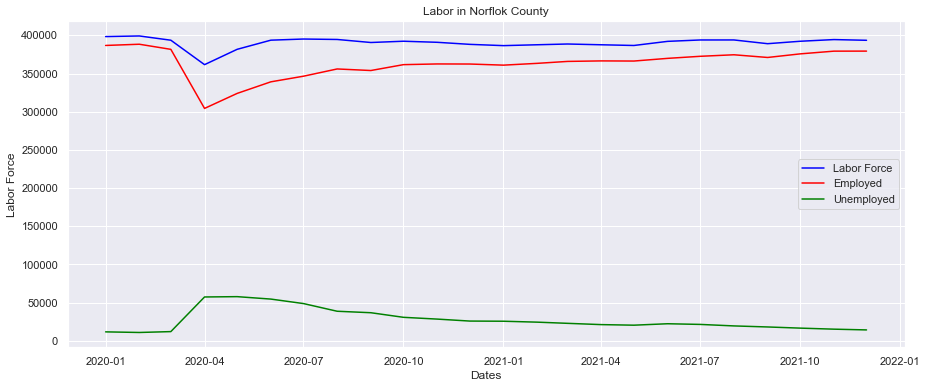

In [9]:
# plotting the the labor force, employed and unemployed numbers
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(labor['date'],labor['Labor Force'], color = 'blue', label="Labor Force")
ax.plot(labor['date'],labor['Employed'], color = 'red', label="Employed")
ax.plot(labor['date'],labor['Unemployed'], color = 'green', label="Unemployed")
ax.legend()
plt.title('Labor in Norflok County')
plt.xlabel('Dates')
plt.ylabel('Labor Force')

**OBSERVATIONS:**
There is a steady decline in the labor force from March 2020 but it the labor force recovers in the later part of the year and shows a slow increase until the end of 2021.

Let's compare the COVID 19 confirmed cases and the employment number by plotting them side-by-side.

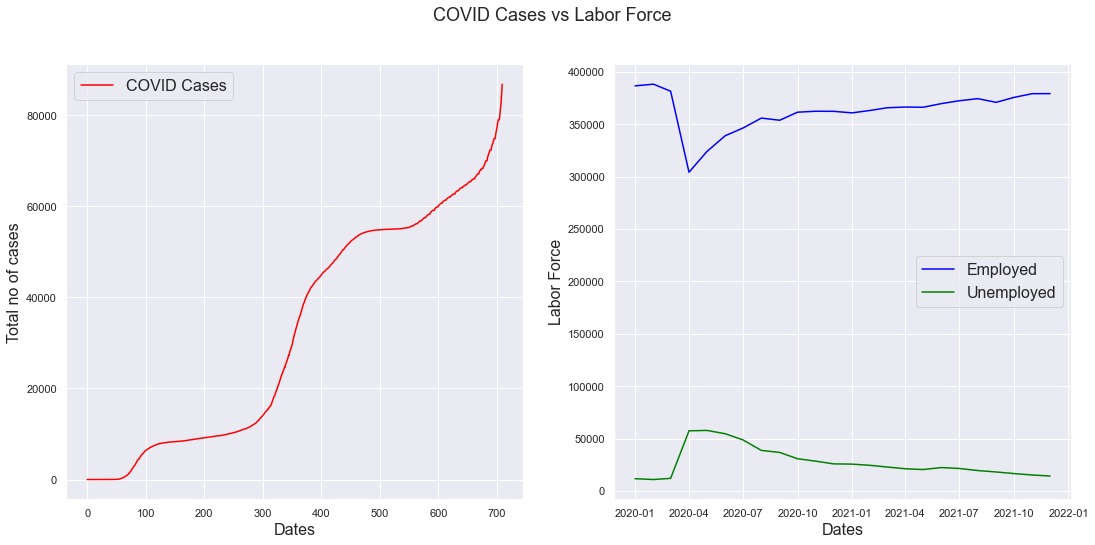

In [10]:
# plotting COVID cases vd Labor Force
fig, (axs1, axs2) = plt.subplots(1, 2,figsize=(18, 8))
plt.suptitle('COVID Cases vs Labor Force',fontsize=18)
axs1.plot(norfolk_df['no_of_cases'], color="red", label="COVID Cases")
axs1.set_ylabel('Total no of cases',fontsize=16)
#axs1.tick_params(axis="y", labelcolor="red")
axs1.set_xlabel('Dates',fontsize=16)
axs1.legend(prop={'size': 16})

axs2.plot(labor['date'],labor['Employed'], color = 'blue', label="Employed")
axs2.plot(labor['date'],labor['Unemployed'], color = 'green', label="Unemployed")
axs2.set_ylabel('Labor Force', fontsize=16)
#axs2.tick_params(axis="y", labelcolor="blue")
axs2.set_xlabel('Dates', fontsize=16)
axs2.legend(prop={'size': 16})
plt.savefig("../results/covid_vs_labor.png",facecolor="white")

**OBSERVATIONS:**
1. At the onset of the pandemic, during the first increase of COVID cases, it can be observed that there is a sharp increase in unemployment in the county.
2. However, as the pandemic progresses and we see a rise in the cases, the unemployment in the county gradually decreases.
3. From the above plots, we cannot say for sure that the impact on employment was solely due to covid cases but it does seem to point that in the face of unexpected disaster, the employment numbers do get impacted until economic support is provided by governments.

Now that we have answered the first two questions of the problem statement, lets explore the unemployment claims data and see how various demographics were impact during the pandemic period.

#### ANALYZING UNEMPLOYMENT CLAIMS DATA

In [11]:
# read dataset
claims = pd.read_csv('../processed/claims_demographic.csv')

In [12]:
claims.head()

,date,county_name,claims,gender male,gender female,gender unknown,race white,race black or african american,race asian,race american indian or alaska native,race native hawaiian or other pacific islander,race race unknown,ethnicity not hispanic,ethnicity hispanic,ethnicity n/a,education less than a high school diploma,education high school or ged,education some college or associate degree,education bachelor's degree,education master's degree or higher
0,2020-01-04,Norfolk County,5265,3425,1838,NaN,3818,588,349,9,15,486,4662,266,337,191,1895,1403,1201,569
1,2020-01-11,Norfolk County,5092,3369,1721,NaN,3749,501,342,11,17,472,4509,266,317,192,1801,1319,1222,552
2,2020-01-18,Norfolk County,5085,3374,1709,NaN,3760,503,323,12,18,469,4493,277,315,189,1806,1302,1205,579
3,2020-01-25,Norfolk County,5062,3396,1664,NaN,3774,487,305,10,16,470,4477,277,308,193,1794,1297,1210,563
4,2020-02-01,Norfolk County,5132,3461,1669,NaN,3841,487,305,12,15,472,4546,282,304,193,1851,1308,1209,567


In [13]:
# convert date column to datetime
claims['date'] = pd.to_datetime(claims['date']) 

Let's plot the unemployment claims for the pandemic period:

Text(0, 0.5, 'No.of claims')

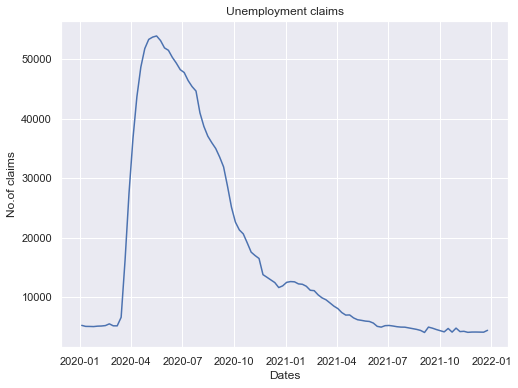

In [14]:
# plotting unemployment claims
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(claims['date'],claims['claims'])
plt.title('Unemployment claims')
plt.xlabel('Dates')
plt.ylabel('No.of claims')

**OBSERVATIONS:**
There is a very big rise in unemployment claims at the onset of the pandemic. This corresponds with the unemployment trend that we noticed in the previous slots. 

Let's delve deeper into the unemployment calaims and see how gender, race, ethnicity and education level behave during this period.

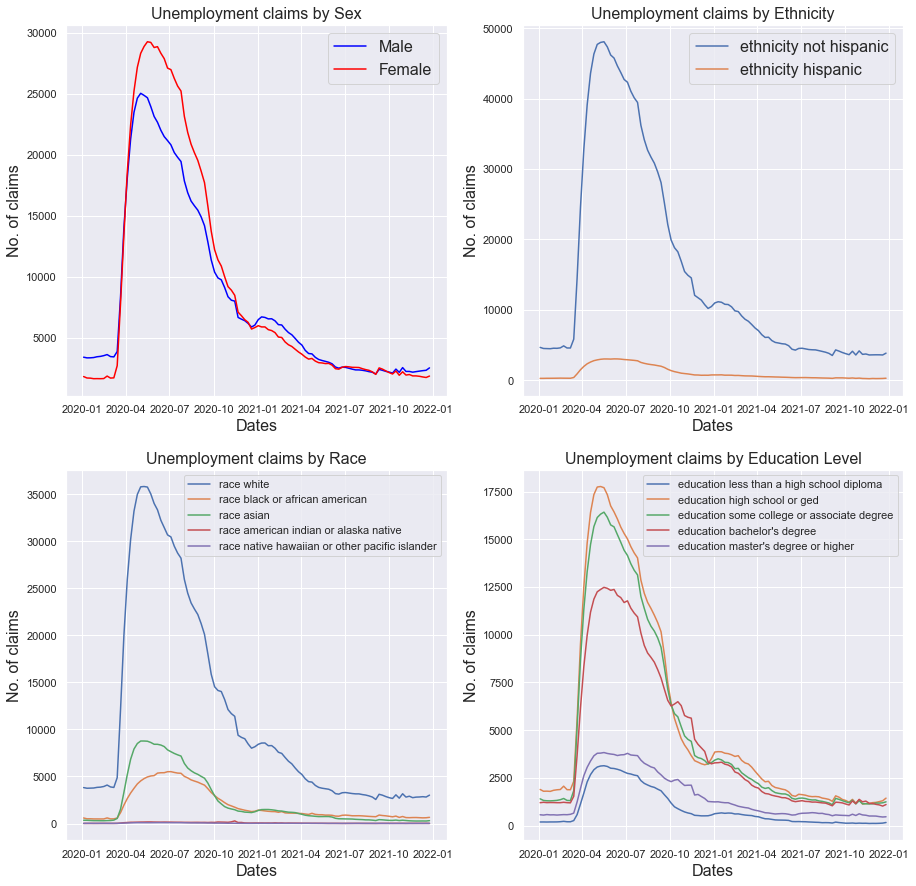

In [15]:
# plotting unemployment claims by Demographics
fig, axs = plt.subplots(2, 2,figsize=(15, 15))

axs[0, 0].plot(claims['date'],claims['gender male'], color = 'blue', label="Male")
axs[0, 0].plot(claims['date'],claims['gender female'], color = 'red', label="Female")
axs[0, 0].legend(prop={'size': 16})
axs[0, 0].set_title('Unemployment claims by Sex',fontsize=16)

ethnicity = claims[claims.columns[12:14]]
labels01 = claims.columns[12:14]
axs[0, 1].plot(claims['date'],ethnicity, label=labels01)
axs[0, 1].set_title('Unemployment claims by Ethnicity',fontsize=16)
axs[0, 1].legend(prop={'size': 16})

race = claims[claims.columns[6:11]]
labels10 = claims.columns[6:11]
axs[1, 0].plot(claims['date'],race,label =labels10)
axs[1, 0].set_title('Unemployment claims by Race',fontsize=16)
axs[1, 0].legend(prop={'size': 11})

education = claims[claims.columns[15:]]
labels11 = claims.columns[15:]
axs[1, 1].plot(claims['date'],education,label =labels11)
axs[1, 1].set_title('Unemployment claims by Education Level',fontsize=16)
axs[1, 1].legend(prop={'size': 11})

for ax in axs.flat:
    ax.set_xlabel('Dates', fontsize = 16)
    ax.set_ylabel('No. of claims', fontsize=16)
plt.savefig('../results/claims.png',facecolor="white")

**OBSERVATIONS:**
1. From the first plot (top left corner), the number of unemployment claims applied by female-identifying people is more than for male-identifying people.
2. From the second plot (top right corner), people having a non hispanic ethnicity have applied for more number of unemployment claims as compared to people having a backgound of hispanic ethnicity.
3. From the third plot (bottom left corner), people of white race have applied for the most number of unemployment claims followed by asians, black/african-americans. The races that have applied for the least number of unemployment claims are american indians/ alaskans and native hawaiians/ pacific islanders.
4. From the last plot (bottom right corner), people having an educational background of high school/ged , some college or associate degree and bachelor's degree have raised the maximum number of unemployment claims. Interesting, people having a master's degree or education level less than high school have applied for the least number of unemployment claims.

What is  missing in these observations is that it does not take into consideration the proportion of distribution of the demographics in the Norfolk County. To understand what proportion of the population by demographics applied for unemployment claims, I look into the demographic distribution in Norfolk County from the US Census Bureau.
The sources of my data are as follows:
- Race & Ethnicity: https://data.census.gov/table?g=0500000US25021&tid=ACSDT1Y2019.B03002
- Age and Sex: https://data.census.gov/table?g=0500000US25021&tid=ACSST5Y2019.S0101
- Education: https://data.census.gov/table?tid=ACSST5Y2020.S1501&g=0500000US25021

I have done all required data processing (like removing unnecessary columns, aggregating values) in Excel and stored the data in the Intermediate folder.

Let's look at these demographic distributions now.

In [16]:
# read the datasets
gender_population = pd.read_csv("../intermediate/gender.csv")
race_population = pd.read_csv("../intermediate/race.csv")
ethnicity_population = pd.read_csv("../intermediate/ethnicity.csv")

In [17]:
gender_population.head()

,YEAR,MALE,FEMALE
0,2020,338772,364968
1,2021,351745,372760


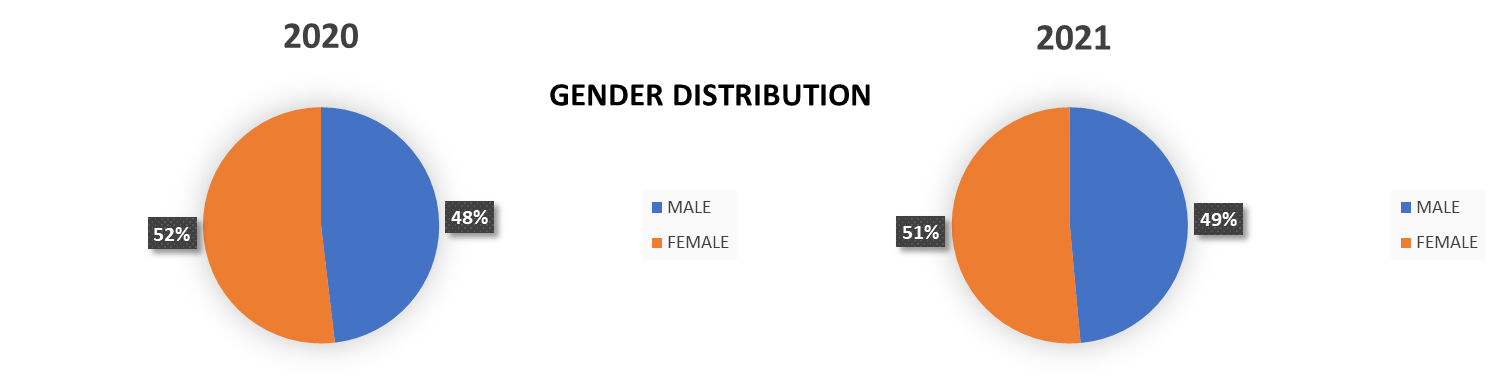

Norfolk County has an approximately equal gender distribution with more female identifying population than male-identifying population.

In [18]:
race_population.head()

,Year,White,Black or African American,Asian,American Indian and Alaska Native,Native Hawaiian and Other Pacific Islander
0,2020,535717,50508,79812,1021,264
1,2021,513055,50614,90615,909,288


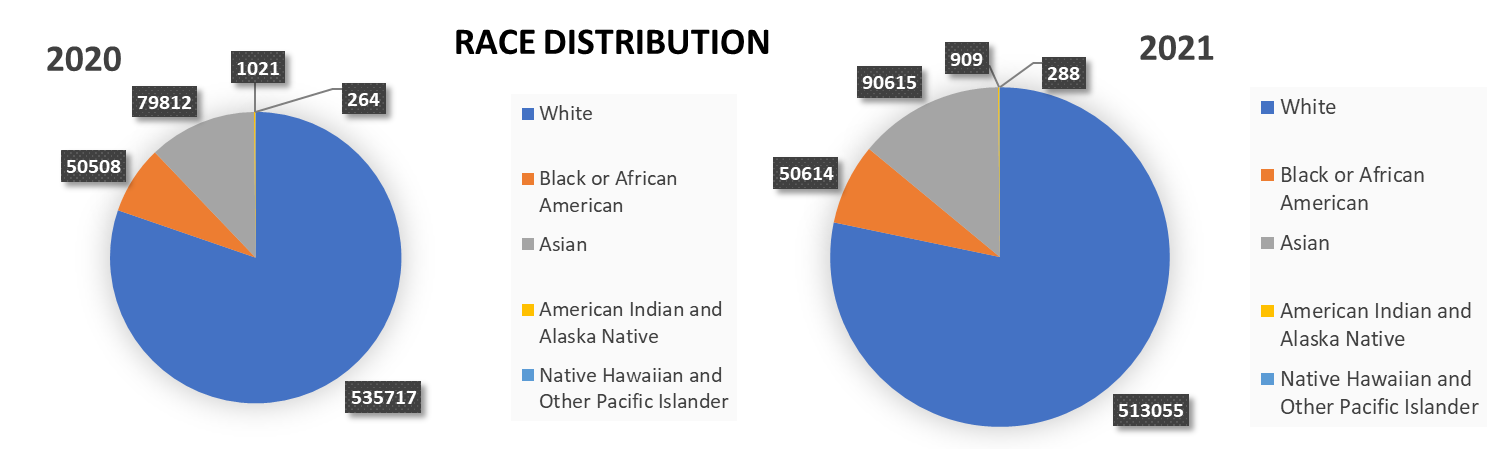

Norfolk County has a majority of White population followed by Asians and Black/African Americans. The distribution of Amrican Indians, Alaskan Natives, Native Hawaiians and other Pacific Islanders is much much smaller than the rest of the population in the county.

In [19]:
ethnicity_population.head()

,Year,Not Hispanic or Latino,Hispanic or Latino
0,2020,670478,33262
1,2021,684875,39630


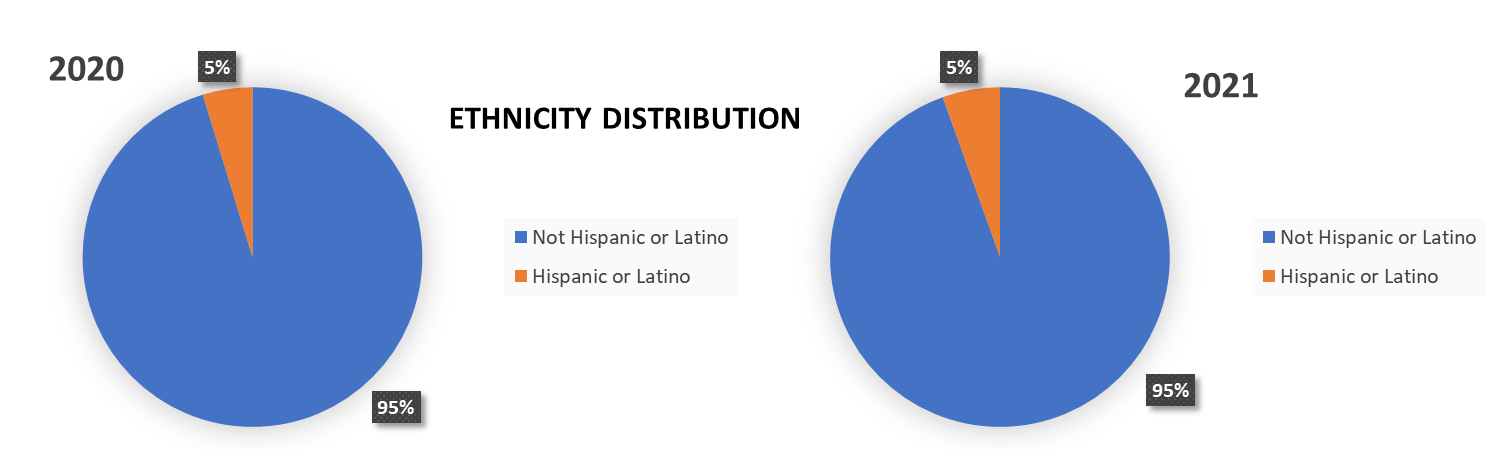

Norfolk County has a majority of people with a not hispanic background.

The idea is to visualize the unemployment claims as a proportion of the population for each demographic caegory so that we can understand how many claims were raised by each community. It will also help us see if any communities were more impacted by the others.

#### CONVERTING UNEMPLOYMENT CLAIMS WEEKLY DATA TO DEMOGRAPHIC PROPORTION

In [20]:
# extracting year and month from date
claims['year'], claims['month'] = claims['date'].dt.year, claims['date'].dt.month_name(locale = 'English')

In [21]:
# creating new columns for sex proportion by diving the unemployment claims by sex population
claims['male_prop'] = claims['gender male']/gender_population.loc[0,'MALE']
claims['male_prop'] = np.where(claims['year']==2021, claims['gender male']/gender_population.loc[1,'MALE'], claims['male_prop'])

claims['female_prop'] = claims['gender female']/gender_population.loc[0,'FEMALE']
claims['female_prop'] = np.where(claims['year']==2021, claims['gender female']/gender_population.loc[1,'FEMALE'], claims['female_prop'])

In [22]:
# creating new columns for race proportion by diving the unemployment claims by race population
claims['white_prop'] = claims['race white']/race_population.loc[0,'White']
claims['white_prop'] = np.where(claims['year']==2021, claims['race white']/race_population.loc[1,'White'], claims['white_prop'])

claims['black_prop'] = claims['race black or african american']/race_population.loc[0,'Black or African American']
claims['black_prop'] = np.where(claims['year']==2021, claims['race black or african american']/race_population.loc[1,'Black or African American'], claims['black_prop'])

claims['asian_prop'] = claims['race asian']/race_population.loc[0,'Asian']
claims['asian_prop'] = np.where(claims['year']==2021, claims['race asian']/race_population.loc[1,'Asian'], claims['asian_prop'])

claims['ai_prop'] = claims['race american indian or alaska native']/race_population.loc[0,'American Indian and Alaska Native']
claims['ai_prop'] = np.where(claims['year']==2021, claims['race american indian or alaska native']/race_population.loc[1,'American Indian and Alaska Native'], claims['ai_prop'])

claims['nh_prop'] = claims['race native hawaiian or other pacific islander']/race_population.loc[0,'Native Hawaiian and Other Pacific Islander']
claims['nh_prop'] = np.where(claims['year']==2021, claims['race native hawaiian or other pacific islander']/race_population.loc[1,'Native Hawaiian and Other Pacific Islander'], claims['nh_prop'])

In [23]:
# creating new columns for ethnicity proportion by diving the unemployment claims by ethnicity population
claims['not_hispanic_prop'] = claims['ethnicity not hispanic']/ethnicity_population.loc[0,'Not Hispanic or Latino']
claims['not_hispanic_prop'] = np.where(claims['year']==2021, claims['ethnicity not hispanic']/ethnicity_population.loc[1,'Not Hispanic or Latino'], claims['not_hispanic_prop'])

claims['hispanic_prop'] = claims['ethnicity hispanic']/ethnicity_population.loc[0,'Hispanic or Latino']
claims['hispanic_prop'] = np.where(claims['year']==2021, claims['ethnicity hispanic']/ethnicity_population.loc[1,'Hispanic or Latino'], claims['hispanic_prop'])

In [24]:
claims.head()

,date,county_name,claims,gender male,gender female,gender unknown,race white,race black or african american,race asian,race american indian or alaska native,...,month,male_prop,female_prop,white_prop,black_prop,asian_prop,ai_prop,nh_prop,not_hispanic_prop,hispanic_prop
0,2020-01-04,Norfolk County,5265,3425,1838,NaN,3818,588,349,9,...,January,0.010110,0.005036,0.007127,0.011642,0.004373,0.008815,0.056818,0.006953,0.007997
1,2020-01-11,Norfolk County,5092,3369,1721,NaN,3749,501,342,11,...,January,0.009945,0.004715,0.006998,0.009919,0.004285,0.010774,0.064394,0.006725,0.007997
2,2020-01-18,Norfolk County,5085,3374,1709,NaN,3760,503,323,12,...,January,0.009960,0.004683,0.007019,0.009959,0.004047,0.011753,0.068182,0.006701,0.008328
3,2020-01-25,Norfolk County,5062,3396,1664,NaN,3774,487,305,10,...,January,0.010024,0.004559,0.007045,0.009642,0.003821,0.009794,0.060606,0.006677,0.008328
4,2020-02-01,Norfolk County,5132,3461,1669,NaN,3841,487,305,12,...,February,0.010216,0.004573,0.007170,0.009642,0.003821,0.011753,0.056818,0.006780,0.008478


#### PLOTTING DATA FOR DEMOGRAPHIC PROPORTION

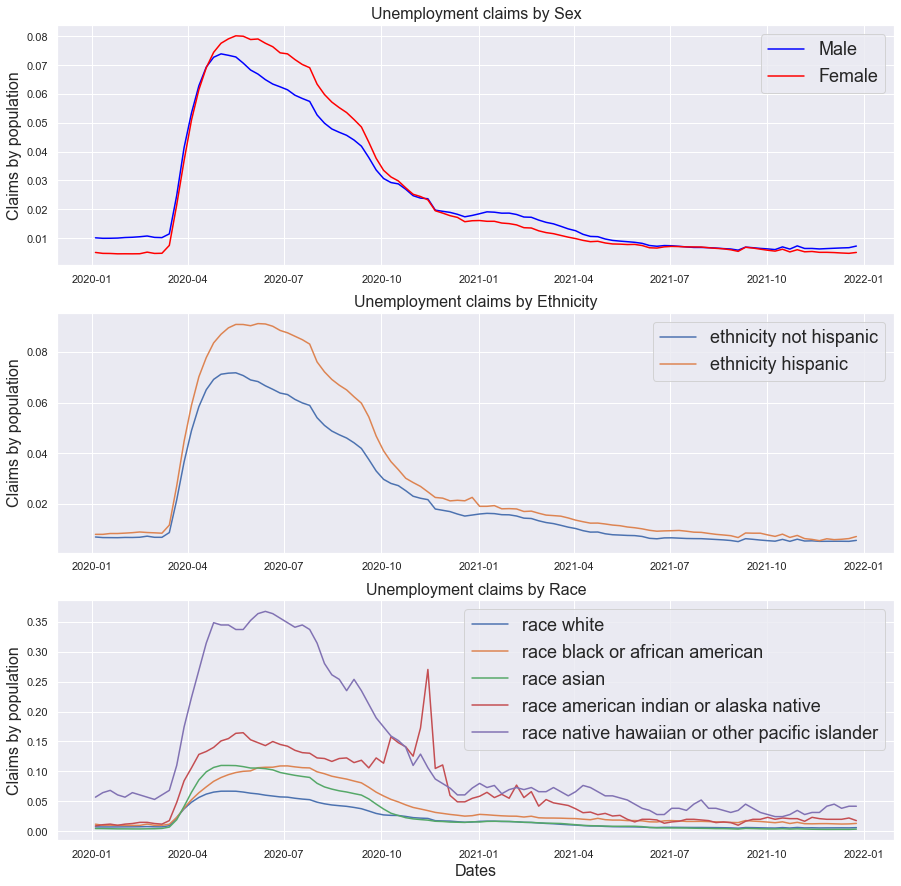

In [30]:
# plotting data from demograohic proportion
fig, (axs1, axs2, axs3) = plt.subplots(3,figsize=(15, 15))

axs1.plot(claims['date'],claims['male_prop'], color = 'blue', label="Male")
axs1.plot(claims['date'],claims['female_prop'], color = 'red', label="Female")
axs1.legend(prop={'size': 18})
axs1.set_title('Unemployment claims by Sex',fontsize=16)
axs1.set_ylabel('Claims by population',fontsize=16)

ethnicity = claims[claims.columns[29:]]
labels01 = claims.columns[12:14]
axs2.plot(claims['date'],ethnicity, label=labels01)
axs2.set_title('Unemployment claims by Ethnicity',fontsize=16)
axs2.set_ylabel('Claims by population',fontsize=16)
axs2.legend(prop={'size': 18})

race = claims[claims.columns[24:29]]
labels10 = claims.columns[6:11]
axs3.plot(claims['date'],race,label =labels10)
axs3.set_title('Unemployment claims by Race',fontsize=16)
axs3.set_xlabel('Dates',fontsize=16)
axs3.set_ylabel('Claims by population',fontsize=16)
axs3.legend(prop={'size': 18})
plt.savefig("../results/demographic.png",facecolor="white")

**OBSERVATIONS:**
1. The number of unemployment claims raised by female-identifying population is still more than that raised by male-identifying population. However, it is noticeable that gap between the two peaks is not as big as it was in the previous graph. There doesn't seem to be a significant difference between the number of claims between two gender categories.
2. Unemployment Claims by ethnicity is a stark contradiction to the previous graph. It can be seen that people of hispanic ethnicity have raised much more number of unemployment claims especially at the peak which is closer to the onset of the pandemic. 
3. Unemployment claims by Race is also a stark contradiction to the previous graph. Minority communities like the american indians and native hawaiians seem to have raised more number of unemploymenet claims followed by asians and blacks/african americans with the lowest number of unemployment claims being race by white people.
4. It can also be seen that the unemployment claims were much higher all throughout 2020 and decreased to a huge extent as we progress into 2021 which is when governments had started releasing economic relief package to help people out.

However, such visualizations just reiterate out suspicions on minority communities being more effected by the pandemic in terms employment than others. To able to see if there is an actually statistically significant difference and help to confirm our suspicions I am going to perform two-tailed Z test for gender and ANOVA Test for Race and Ethnicity.

#### STATISTICAL ANALYSIS

##### HYPOTHESIS 1:

Let's start with **SEX**. I create a  dataframe that contains only the male and female proportion calculated earlier. The first step is to check if they have equal variance. I will plot the boxplots to to visualize that and then state my null hypothesis and perform 2 tailed Z test on the dataset.

In [35]:
# create dataframe containing only male and female proportion
gender = claims[claims.columns[22:24]]

<AxesSubplot:>

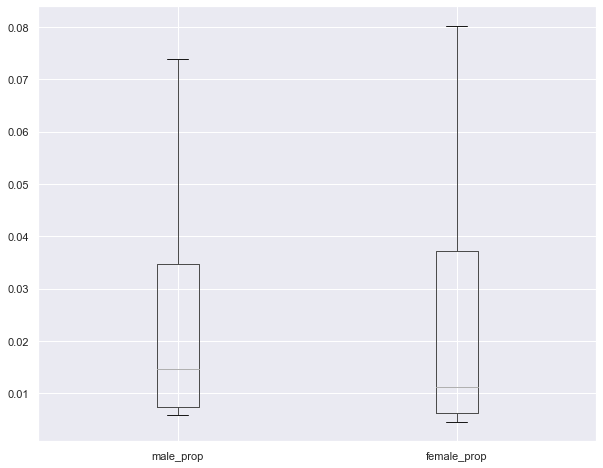

In [43]:
# plotting boxplot for gender distribution to understand the variance
gender.boxplot(figsize=(10,8))

**Null Hypothesis:**

The average number of unemployment claims raised by female identifying people is equal to the average number of unemployemt claims raised by male identifying people.

In [38]:
print("\n----- 2-tailed unequal variance Z test ------")

male = gender['male_prop']
female = gender['female_prop']
mean_diff = male.mean() - female.mean()
std_err = math.sqrt((male.var()/len(male)) + (female.var()/len(female)))

z_score = mean_diff / std_err
p_val = scipy.stats.norm.sf(abs(z_score))*2

print(f"\nusing formula")
print(f"test statistic: {z_score}, p-value:{p_val}")

print(f"\nusing built-in python function")

res1 = ws.ztest(x1 = male, x2 = female)
print(res1)


----- 2-tailed unequal variance Z test ------

using formula
test statistic: -0.16969006442715895, p-value:0.8652538881885855

using built-in python function
(-0.16969006442715892, 0.8652538881885855)


**OBSERVATION:**
Since the p value is much greater than 0.05, we do not have sufficient evidence to reject the null hypothesis.

##### HYPOTHESIS 2:

Let's do the same for **ETHNICITY**. I have already created a dataframe for visualization earlier containing the hispanic and not hispanic proportions. Let's reuse that, look at the variance and then state the null hypothesis and perform the 2 tailed Z test.

<AxesSubplot:>

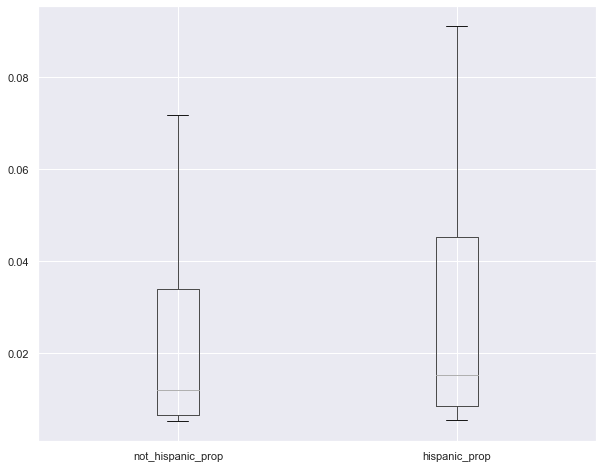

In [45]:
# plotting boxplot for ethnicity distribution to understand the variance
ethnicity.boxplot(figsize=(10,8))

**Null Hypothesis:**

The average number of unemployment claims raised by people with hisanic background is equal to the average number of unemployemt claims raised by people with non hispanic background.

In [47]:
print("\n----- 2-tailed unequal variance Z test ------")

hispanic = ethnicity['hispanic_prop']
not_hispanic = ethnicity['not_hispanic_prop']
mean_diff = hispanic.mean() - not_hispanic.mean()
std_err = math.sqrt((hispanic.var()/len(hispanic)) + (not_hispanic.var()/len(not_hispanic)))

z_score = mean_diff / std_err
p_val = scipy.stats.norm.sf(abs(z_score))*2

print(f"\nusing formula")
print(f"test statistic: {z_score}, p-value:{p_val}")

print(f"\nusing built-in python function")

res1 = ws.ztest(x1 = hispanic, x2 = not_hispanic)
print(res1)


----- 2-tailed unequal variance Z test ------

using formula
test statistic: 1.9897214640854368, p-value:0.04662162691004829

using built-in python function
(1.9897214640854366, 0.046621626910048335)


**OBSERVATION:**
Since the p value is less than 0.05, we have enough evidence to reject the null hypothesis.

##### HYPOTHESIS 3:

Finally, let's repeat the analysis but this time for **RACE**. I had created a a dataframe race for visualization purposes that contain the new columns with race as proportion of population as values. I am going to reuse that, look at the varinace in each category, and then state my null hypothesis and perform the pairwise independent Z-test.

<AxesSubplot:>

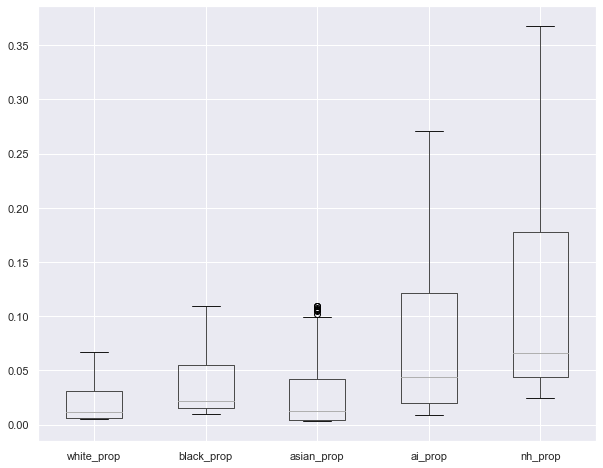

In [48]:
# plotting boxplot for race distribution to understand the variance
race.boxplot(figsize=(10,8))

**Null Hypothesis:**
 The average unemployment claims of all groups are equal.

In [53]:
# pairwise independent Z-test
from statsmodels.stats import weightstats as ws

print(f"\nusing built-in python function\n")
exp = race.columns
for i in range(len(exp)-1):
    for j in range(i+1, len(exp)):
        x = race[exp[i]]
        y = race[exp[j]]
        res = ws.ztest(x1 = x, x2 = y, value = 0, alternative = 'two-sided', usevar = 'pooled')
        print(f"Class {exp[i], exp[j]} --> {res}")


using built-in python function

Class ('white_prop', 'black_prop') --> (-4.430770905568302, 9.38968036676055e-06)
Class ('white_prop', 'asian_prop') --> (-1.9364382720838134, 0.0528140458792887)
Class ('white_prop', 'ai_prop') --> (-7.552437276075564, 4.271873958920611e-14)
Class ('white_prop', 'nh_prop') --> (-9.070888939099634, 1.1804992765556154e-19)
Class ('black_prop', 'asian_prop') --> (1.900258513184823, 0.05739920285609601)
Class ('black_prop', 'ai_prop') --> (-4.292536298822846, 1.7664366102426585e-05)
Class ('black_prop', 'nh_prop') --> (-7.380336251221838, 1.5789025848852986e-13)
Class ('asian_prop', 'ai_prop') --> (-5.5935552306328535, 2.2246641232379362e-08)
Class ('asian_prop', 'nh_prop') --> (-8.11640224774663, 4.802071821668215e-16)
Class ('ai_prop', 'nh_prop') --> (-4.65015580297311, 3.316843646969653e-06)


**OBSERVATIONS:**
1. The p-value is greater than 0.05 for White race and Asian race which means we do not have have sufficient evidence to reject the null hypothesis that the average unemployment claims raised by people of white race is equal to the average unemployment claims raised by asian people.
2. The p-value is greater than 0.05 for Black race and Asian race which means we do not have have sufficient evidence to reject the null hypothesis that the average unemployment claims raised by people of black race is equal to the average unemployment claims raised by asian people.
3. For all other comparisions the p value is less than 0.5, which means that we have suffient evidence to reject the nul hypothesis. The number of unemployment claims are not equal among all other groups. Which indicates that certain group have been more impacted than others by the onset of the pandemic.